In [1]:
# 数据可视化项目展示

# 案例一：matplotlib，作折线图、直方图、横竖向条形图、饼图

# 利用matplotlib 分析链家租房数据并制作可视化图表
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.font_manager import fontManager as fm
import matplotlib
# 显示中文字体为内置的字体文件，并全局设置为导入的字体；
fm.addfont('/kaggle/input/ygbuding/DroidSansFallback.ttf')
matplotlib.rc('font',family = 'Droid Sans Fallback',size=10)
plt.rcParams['axes.unicode_minus'] = False # 设置负号，以ASCII 字符'-'来显示，避免出现方块；
plt.rcParams['axes.titlesize'] = 10 # 设置标题字体大小

In [2]:
# task1--读取 CSV 格式文件“task_2_lianjia_data.csv”;
# 将数据命名为 lianjia_data;
# 并选取前部数据查看;
lianjia_data = pd.read_csv('/kaggle/input/lianjia-data/task_2_lianjia_data.csv')
print(lianjia_data)

               简介（方式·小区名 户型 朝向）   区  地铁站               村  面积大小（㎡）   朝向  \
0                整租·长桥一村 1室0厅 南  徐汇   长桥            长桥一村       39    南   
1                整租·馨宁公寓 1室1厅 南  徐汇   华泾            馨宁公寓       42    南   
2                整租·长桥三村 2室1厅 南  徐汇   长桥            长桥三村       51    南   
3                整租·东湾小区 1室1厅 南  徐汇   华泾            东湾小区       47    南   
4              整租·花苑村紫竹园 1室1厅 南  徐汇   康健          花苑村紫竹园       42    南   
..                          ...  ..  ...             ...      ...  ...   
747  整租·布鲁斯小镇(绿地·皇家官邸) 3室2厅 南/北  浦东   惠南  布鲁斯小镇(绿地·皇家官邸)      171  南 北   
748            整租·开鲁四村 1室1厅 南/北  杨浦   中原            开鲁四村       41  南 北   
749           整租·民乐城康苑 3室2厅 南/北  浦东   惠南           民乐城康苑      125  南 北   
750              整租·五岭小区 1室0厅 南  黄浦  打浦桥            五岭小区       36    南   
751           整租·武川路245弄 1室1厅 南  杨浦  五角场         武川路245弄       34    南   

         户型                         楼层类型  楼层（层）           标签  
0    1室0厅1卫  高楼层                              6 

In [3]:
print(lianjia_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   简介（方式·小区名 户型 朝向）  752 non-null    object
 1   区                 752 non-null    object
 2   地铁站               752 non-null    object
 3   村                 752 non-null    object
 4   面积大小（㎡）           752 non-null    int64 
 5   朝向                752 non-null    object
 6   户型                752 non-null    object
 7   楼层类型              752 non-null    object
 8   楼层（层）             752 non-null    int64 
 9   标签                752 non-null    object
dtypes: int64(2), object(8)
memory usage: 58.9+ KB
None


In [4]:
print(lianjia_data.describe())

          面积大小（㎡）       楼层（层）
count  752.000000  752.000000
mean    51.535904    8.275266
std     27.065710    6.175207
min      7.000000    1.000000
25%     34.000000    6.000000
50%     43.000000    6.000000
75%     61.250000    7.000000
max    172.000000   35.000000


In [5]:
print(lianjia_data.head())

   简介（方式·小区名 户型 朝向）   区 地铁站       村  面积大小（㎡） 朝向      户型  \
0    整租·长桥一村 1室0厅 南  徐汇  长桥    长桥一村       39  南  1室0厅1卫   
1    整租·馨宁公寓 1室1厅 南  徐汇  华泾    馨宁公寓       42  南  1室1厅1卫   
2    整租·长桥三村 2室1厅 南  徐汇  长桥    长桥三村       51  南  2室1厅1卫   
3    整租·东湾小区 1室1厅 南  徐汇  华泾    东湾小区       47  南  1室1厅1卫   
4  整租·花苑村紫竹园 1室1厅 南  徐汇  康健  花苑村紫竹园       42  南  1室1厅1卫   

                          楼层类型  楼层（层）       标签  
0  高楼层                              6     随时看房  
1  高楼层                             29  精装,随时看房  
2  高楼层                              6     随时看房  
3  中楼层                              6     随时看房  
4  高楼层                              6     随时看房  


In [6]:
# task2--利用 groupby 函数，以【面积大小（㎡）】字段进行 groupby;
# 统计各个面积下的【房源数量】情况;
a = lianjia_data.groupby('面积大小（㎡）')['区'].agg([('房源数量','count')])
print(a)
print('-'*30)
print(type(a))

         房源数量
面积大小（㎡）      
7           1
9           3
10          1
11          1
12          1
...       ...
152         1
155         1
162         1
171         1
172         1

[123 rows x 1 columns]
------------------------------
<class 'pandas.core.frame.DataFrame'>


In [7]:
# task3--将第2问所统计数据，作折线图和条形图;
# 并得出相关结论，
# 提示:先提取第2问 所得数据表的 index 索引，并转化成 list;
# 再提取【房源数量】的值转成 list;
# 提取lianjia_squre的索引，即不同的面积大小，并转换成list，用作横坐标值
a_x = list(a.index)
print(a_x)

[7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106, 108, 109, 110, 111, 113, 116, 118, 121, 123, 125, 126, 128, 129, 130, 131, 133, 137, 139, 143, 145, 151, 152, 155, 162, 171, 172]


In [8]:
# 提取lianjia_squre【房源数量】的数据值，用作纵坐标值
a_y = list(a['房源数量'].values)
print(a_y)

[1, 3, 1, 1, 1, 1, 2, 5, 4, 1, 4, 1, 7, 2, 4, 4, 4, 6, 3, 7, 12, 16, 37, 11, 19, 21, 29, 38, 24, 18, 24, 11, 9, 22, 20, 15, 8, 16, 15, 10, 17, 9, 14, 10, 17, 8, 9, 10, 6, 3, 4, 3, 8, 9, 6, 5, 6, 3, 7, 2, 5, 4, 5, 4, 2, 3, 3, 2, 4, 2, 3, 3, 6, 3, 2, 1, 2, 1, 2, 2, 6, 4, 7, 3, 5, 2, 3, 9, 4, 2, 4, 3, 2, 2, 1, 4, 4, 2, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


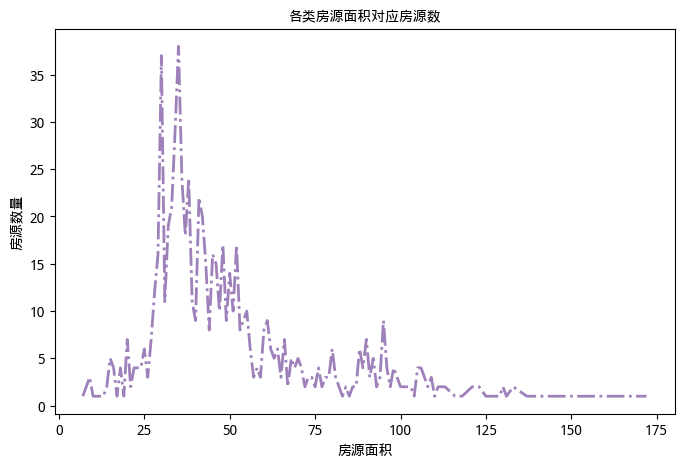

In [9]:
# 调用plt，作趋势图（即折线图）
# 设置图片大小
plt.figure(figsize=(8,5))
# plt.plot（横坐标数值，纵坐标数值，线的类型，颜色，线宽，标记点类型，标记大小,与下方一一对应
plt.plot(a_x,a_y,'-.',color = '#9e81ba',linewidth = 2)
# 设置图片标题
plt.title('各类房源面积对应房源数')
# 设置图片横轴标签
plt.xlabel('房源面积')
# 设置图片纵轴标签
plt.ylabel('房源数量')
# plt.rcParams['figure.figsize'] = (25,15)
# 展示图片
plt.show()

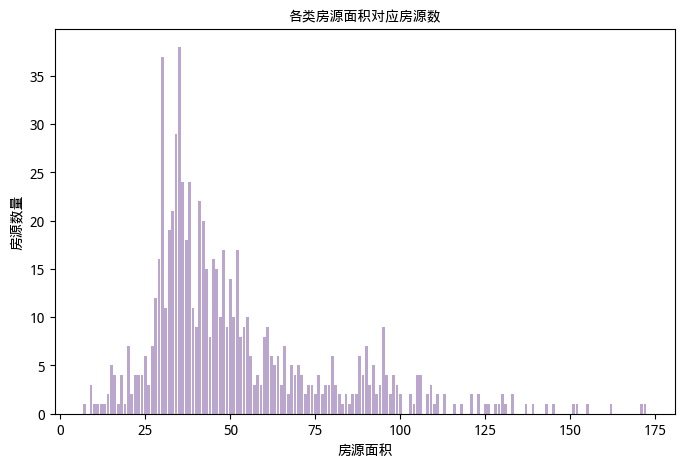

In [10]:
# 调用plt，作条形图--直方图形式
# 设置图片大小
plt.figure(figsize=(8,5))
# plt.bar（横坐标数值，纵坐标数值，条形分布类型，颜色，条形透明度）
# plt.bar(lianjia_squre_index,lianjia_count,align="center",color="r",alpha=0.7)
plt.bar(a_x,a_y,align='center',color = '#9e81ba',alpha = 0.7)
# 设置图片标题
plt.title('各类房源面积对应房源数')
# 设置图片横轴标签
plt.xlabel('房源面积')
# 设置图片纵轴标签
plt.ylabel('房源数量')
# 展示图片
plt.show()

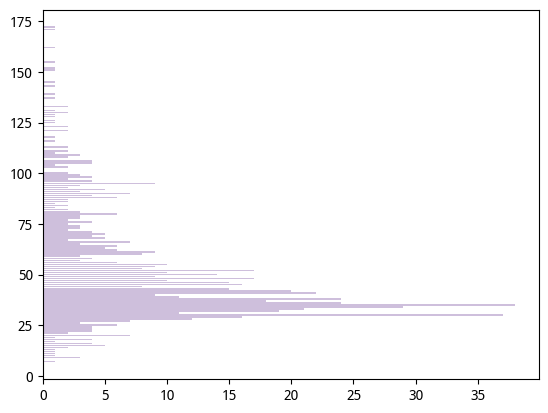

In [11]:
# 横向条形图
plt.barh(a_x,a_y,align="center",color='#9e81ba',alpha=0.5)
# 展示图片
plt.show()

In [12]:
# task4--利用 groupby 函数，
# 以【区】字段进行 groupby，
# 统计各个上海各个“区”所属的【房源数量】情况;
b = lianjia_data.groupby('区')['户型'].agg([('房源数量','count')])
print(b)

    房源数量
区       
嘉定     6
奉贤     1
徐汇   126
普陀    22
杨浦    56
松江    45
浦东   106
虹口    24
长宁    86
闵行    86
青浦    10
静安   108
黄浦    76


In [13]:
# task5--将第4问所统计数据，作条形图，并得出相关结论;
b.sort_values(by='房源数量',ascending=False,inplace=True)
print(b)

    房源数量
区       
徐汇   126
静安   108
浦东   106
长宁    86
闵行    86
黄浦    76
杨浦    56
松江    45
虹口    24
普陀    22
青浦    10
嘉定     6
奉贤     1


In [14]:
# 提取相应索引，用作横坐标值
b_x = list(b.index)
print(b_x)

['徐汇', '静安', '浦东', '长宁', '闵行', '黄浦', '杨浦', '松江', '虹口', '普陀', '青浦', '嘉定', '奉贤']


In [15]:
# 提取【房源数量】值,用作纵坐标值
b_y = list(b['房源数量'].values)
print(b_y)

[126, 108, 106, 86, 86, 76, 56, 45, 24, 22, 10, 6, 1]


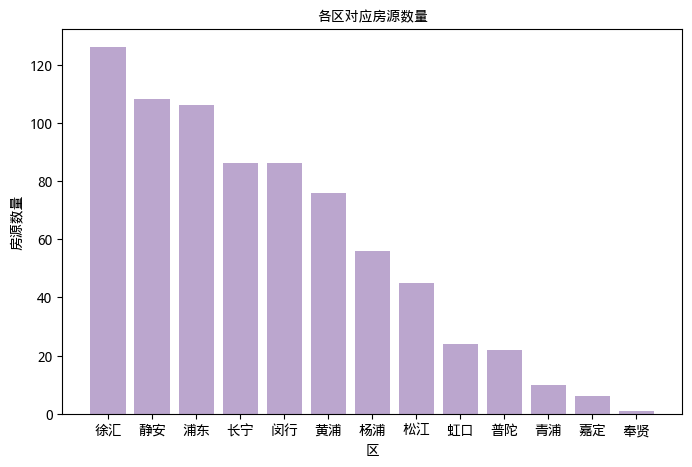

In [16]:
# 调用plt，作条形图
# 设置图片大小
plt.figure(figsize=(8,5))
# plt.bar（横坐标数值，纵坐标数值，条形分布类型，颜色，条形透明度）
plt.bar(b_x,b_y,align='center',color = '#9e81ba',alpha = 0.7)
# 设置图片标题
plt.title('各区对应房源数量')
# 设置图片横轴标签
plt.xlabel('区')
# 设置图片纵轴标签
plt.ylabel('房源数量')
# 保存图片为
plt.savefig('district_bar.jpeg')
# 展示图片
plt.show()

In [17]:
# task6--利用 groupby 函数，
# 以【楼层类型】字段进行 groupby，
# 统计各个楼层所属的【房源数量】情况;
c = lianjia_data.groupby('楼层类型')['区'].agg([('房源数量','count')]).sort_values(by='房源数量',ascending=False)
print(c)

                             房源数量
楼层类型                             
高楼层                           370
中楼层                           231
低楼层                           146
地下室                             5


In [18]:
# task7--将第6问所统计数据，作饼图，并得出相关结论。
# 提取相应索引，做横坐标值
c_x = list(c.index)
print(c_x)

['高楼层                        ', '中楼层                        ', '低楼层                        ', '地下室                        ']


In [19]:
# 提取相应索引，做纵坐标值
c_y = list(c['房源数量'].values)
print(c_y)

[370, 231, 146, 5]


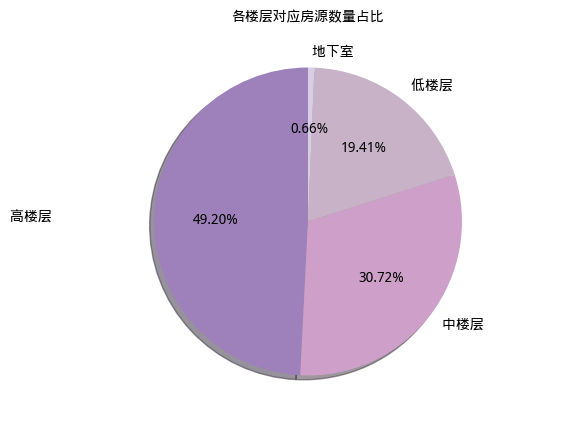

In [20]:
# 调用plt，作饼图
# 设置图片大小
plt.figure(figsize=(8,5))
# 设置颜色
list_color =['#9e81ba','#cea0c9','#c7b2c7','#d8cde3']
# plt.pie（数值，数值的标签，百分比，开始位置）
plt.pie(c_y,labels=c_x,autopct='%.2f%%',startangle=90,colors = list_color,\
        shadow=True)
# 设置图片标题
plt.title('各楼层对应房源数量占比')
# 展示图片
plt.show()

In [21]:
# 案例二：matplotlib，作散点图、箱型图

# 利用 matplotlib 分析知乎文章相关数据并制作可视化图表
# task1--读取 CSV 格式文件“task_3.1_zhihu_timeline_answer.csv”
# 并查看前部数据;
zhihu_data_answer = pd.read_csv('/kaggle/input/zhihu-data/task_3.1_zhihu_timeline_answer.csv')
print(zhihu_data_answer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   类型      1029 non-null   object
 1   id      1029 non-null   object
 2   标签      1029 non-null   object
 3   回答id    1029 non-null   int64 
 4   回答点赞数   1029 non-null   int64 
 5   回答评论数   1029 non-null   int64 
 6   回答感谢数   1029 non-null   int64 
 7   回答观看数   1029 non-null   int64 
 8   回答创建时间  1029 non-null   int64 
 9   问题id    1029 non-null   int64 
 10  问题题目    1029 non-null   object
 11  问题回答数   1029 non-null   int64 
 12  问题关注数   1029 non-null   int64 
 13  评论数     1029 non-null   int64 
 14  创建时间    1029 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 120.7+ KB
None


In [22]:
print(zhihu_data_answer.describe())

               回答id          回答点赞数         回答评论数          回答感谢数         回答观看数  \
count  1.029000e+03    1029.000000   1029.000000    1029.000000  1.029000e+03   
mean   8.378231e+08    7849.689990    633.607386    2611.756074  7.653330e+05   
std    8.545346e+07   17337.326711   1492.118807    7845.849610  1.077374e+06   
min    1.162789e+08       0.000000      0.000000       0.000000  1.000000e+01   
25%    8.081958e+08     408.000000     56.000000      53.000000  6.079900e+04   
50%    8.577429e+08    2291.000000    228.000000     292.000000  3.246180e+05   
75%    8.950267e+08    8074.000000    631.000000    1248.000000  1.028761e+06   
max    9.121103e+08  295573.000000  29908.000000  102612.000000  9.005343e+06   

             回答创建时间          问题id          问题回答数          问题关注数          评论数  \
count  1.029000e+03  1.029000e+03    1029.000000    1029.000000  1029.000000   
mean   1.569282e+09  2.476608e+08    2363.181730   24754.673469    45.656948   
std    8.156966e+06  1.257015e

In [23]:
print(zhihu_data_answer.head())

       类型                 id   标签       回答id  回答点赞数  回答评论数  回答感谢数    回答观看数  \
0  answer  12_1574824946.178  二次元  734170020   4859    656    564  1120728   
1  answer   13_1574824946.45   生活  629465796  46827   1594  12491  4517999   
2  answer  14_1574824946.791   高考  344182099  25739   2465   5072  1575771   
3  answer  15_1574824946.795   网恋  792191898   8948   1938    965  1261527   
4  answer  17_1574824946.818   健康  868188823    884    246    235   329706   

       回答创建时间       问题id                  问题题目  问题回答数  问题关注数  评论数        创建时间  
0  1561974232   62972819  你们见过最好看的 coser 长什么样？   1607  30094   30  1501051575  
1  1553236233   63894266          生活中有哪些残忍的真相？   2505  57217   50  1502701040  
2  1521306846  266837866  你们是怎么考上 985 的，每科多少分？   3527  28092   64  1518015871  
3  1566029684  270608371         网恋奔现失败是种什么体验？   5751  28491  122  1522496497  
4  1571893264   27128132              如何有效地戒糖？    500  19048   33  1418828372  


In [24]:
# task2--提取“task_3.1_zhihu_timeline_answer.csv”中【回答点赞数】和【回答感谢数】列数据，制成散点图，
# 观察两者的关系
a = zhihu_data_answer.loc[:,['回答点赞数','回答感谢数']]
print(type(a))
print('-'*30)
print(a)

<class 'pandas.core.frame.DataFrame'>
------------------------------
      回答点赞数  回答感谢数
0      4859    564
1     46827  12491
2     25739   5072
3      8948    965
4       884    235
...     ...    ...
1024    947    551
1025      0      0
1026   3608    212
1027   1161    192
1028   5154    665

[1029 rows x 2 columns]


In [25]:
# 设置横坐标轴
a_x = a['回答点赞数'].values.tolist()
# 仅展示 a_x 列表，前10个元素值，观测 格式转换 是否正确；下同；
print(a_x[:10])

[4859, 46827, 25739, 8948, 884, 1686, 4, 95, 5968, 612]


In [26]:
# 设置纵坐标轴
a_y = a['回答感谢数'].tolist()
print(a_y[:10])

[564, 12491, 5072, 965, 235, 142, 1, 19, 2332, 46]


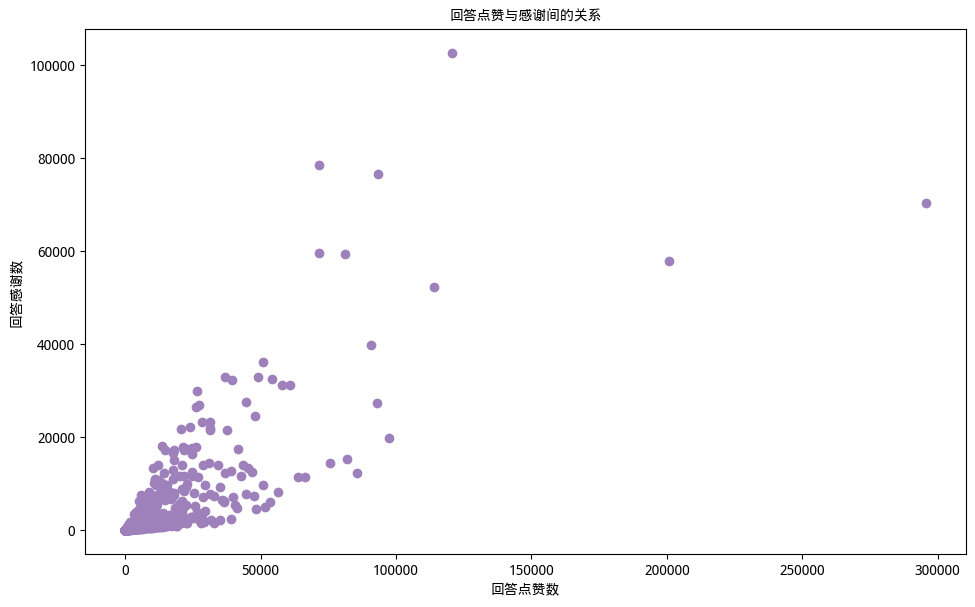

In [27]:
# 调用plt，作散点图
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号）
# plt.sbuplot(a,b,c):a:行数，b:列数,c:图形序号
plt.subplot(2,2,1)
ax1 = plt.scatter(a_x,a_y,color = '#9e81ba',marker='o')
# 设置图片标题
plt.title('回答点赞与感谢间的关系')
# 设置横坐标标签
plt.xlabel('回答点赞数')
# 设置纵坐标标签
plt.ylabel('回答感谢数')
# 设置图片大小
ax1.figure.set_size_inches(25,15)

In [28]:
# task3--提取“task_3.1_zhihu_timeline_answer.csv”中【问题回答数】和【问题关注数】列数据，
# 制成散点图， 观察两者的关系;
b = zhihu_data_answer.loc[:,['问题回答数','问题关注数']]
print(b)

      问题回答数  问题关注数
0      1607  30094
1      2505  57217
2      3527  28092
3      5751  28491
4       500  19048
...     ...    ...
1024    232   5810
1025    809   3309
1026   4929  64602
1027    135   2436
1028    594  18323

[1029 rows x 2 columns]


In [29]:
# 设置横坐标轴
b_x = b['问题回答数'].values.tolist()
print(b_x[:10])

[1607, 2505, 3527, 5751, 500, 636, 14628, 919, 437, 213]


In [30]:
# 设置纵坐标轴
b_y = b['问题关注数'].tolist()
print(b_y[:10])

[30094, 57217, 28092, 28491, 19048, 3814, 129885, 15872, 117434, 3686]


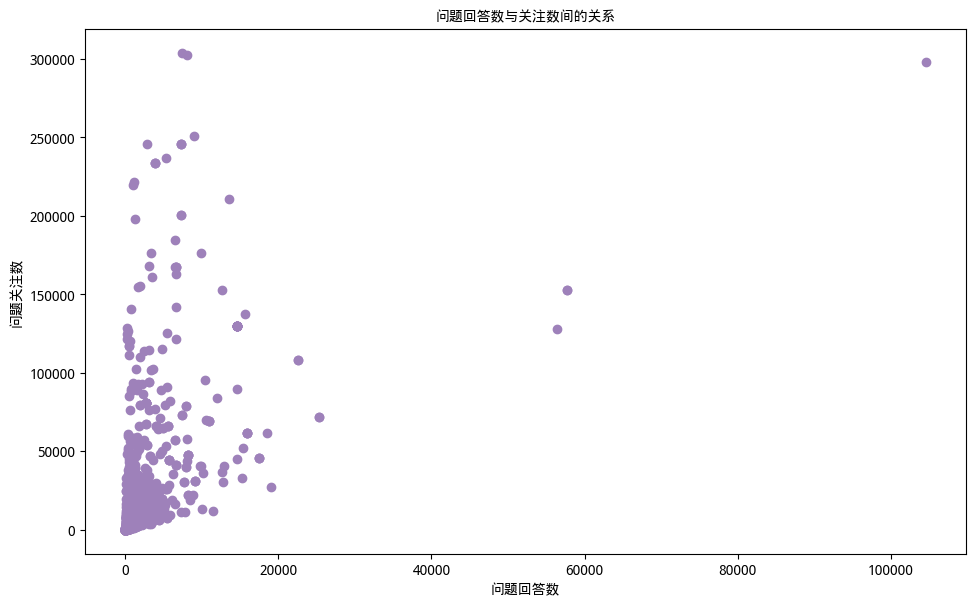

In [31]:
# 调用plt，作散点图
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号）
plt.subplot(2,2,2)
ax1=plt.scatter(b_x,b_y,color = '#9e81ba',marker='o')
# 设置图片标题
plt.title('问题回答数与关注数间的关系')
# 设置横坐标标签
plt.xlabel('问题回答数')
# 设置纵坐标标签
plt.ylabel('问题关注数')
# 设置图片大小
ax1.figure.set_size_inches(25,15)

In [32]:
# task4--读取 CSV 格式文件“task_3.2_zhihu_timeline_article.csv”
# 查看前部数据;
zhihu_data_article = pd.read_csv('/kaggle/input/zhihu-2/task_3.2_zhihu_timeline_article.csv')
print(zhihu_data_article)

          类型               总 id                     关键词     文章 id  文章点赞数  \
0    article  14_1574825136.990                     李小璐  90620737    774   
1    article  14_1574825137.717                     主持人  90576308  25365   
2    article  13_1574825137.707                      刘涛  92353372    339   
3    article  14_1574825138.917                    网贷风险  83742265    149   
4    article  16_1574825138.573                陈情令（电视剧）  93060585     38   
..       ...                ...                     ...       ...    ...   
491  article  14_1574825320.773                     体制内  77431584    565   
492  article  15_1574825320.715                   香港娱乐圈  90663584    380   
493  article  16_1574825320.248                   加密/解密  93672329      1   
494  article  12_1574825320.700  李小璐 & PG_ONE（2017年末事件）  89556408   1485   
495  article  17_1574825320.876                      家居  88551490    134   

     文章评论数                   文章题目（文章没有感谢数）    文章观看数      文章创建时间  
0      267    “李小璐出轨视

In [33]:
print(zhihu_data_article.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   类型             496 non-null    object
 1   总 id           496 non-null    object
 2   关键词            496 non-null    object
 3   文章 id          496 non-null    int64 
 4   文章点赞数          496 non-null    int64 
 5   文章评论数          496 non-null    int64 
 6   文章题目（文章没有感谢数）  496 non-null    object
 7   文章观看数          496 non-null    int64 
 8   文章创建时间         496 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.0+ KB
None


In [34]:
print(zhihu_data_article.describe())

              文章 id         文章点赞数        文章评论数         文章观看数        文章创建时间
count  4.960000e+02    496.000000   496.000000  4.960000e+02  4.960000e+02
mean   8.677374e+07   2598.387097   295.633065  3.008528e+05  1.570314e+09
std    9.691967e+06   5882.901583   548.519490  5.473216e+05  9.563336e+06
min    2.289465e+07      0.000000     0.000000  6.000000e+00  1.476244e+09
25%    8.456310e+07     80.000000    18.500000  1.325450e+04  1.570257e+09
50%    8.944848e+07    512.000000   102.000000  9.642000e+04  1.572499e+09
75%    9.216102e+07   2147.000000   288.000000  3.441048e+05  1.573945e+09
max    9.388997e+07  48556.000000  4529.000000  4.059937e+06  1.574821e+09


In [35]:
print(zhihu_data_article.head())

        类型               总 id       关键词     文章 id  文章点赞数  文章评论数  \
0  article  14_1574825136.990       李小璐  90620737    774    267   
1  article  14_1574825137.717       主持人  90576308  25365   1157   
2  article  13_1574825137.707        刘涛  92353372    339     65   
3  article  14_1574825138.917      网贷风险  83742265    149     90   
4  article  16_1574825138.573  陈情令（电视剧）  93060585     38      1   

                  文章题目（文章没有感谢数）    文章观看数      文章创建时间  
0  “李小璐出轨视频曝光7天后，我识破了令人胆寒的爱情真相”   245037  1573089756  
1     谢娜与董卿同台被“碾压”: 文化断层到底有多可怕?  1072054  1573047546  
2                       刘涛，你够了！   215292  1574051699  
3             因面子，深陷网贷的我，最后这样上岸    63565  1569225309  
4       你是什么样的含光君？浅析剧版与书版蓝忘机的差异     2779  1574349813  


In [36]:
# task5--提取“task_3.2_zhihu_timeline_article.csv”中【文章点赞数】和【文章评论数】列数据，
# 制成散点图，观察两者的关系
c = zhihu_data_article.loc[:,['文章点赞数','文章评论数']]
print(c)

     文章点赞数  文章评论数
0      774    267
1    25365   1157
2      339     65
3      149     90
4       38      1
..     ...    ...
491    565    148
492    380     65
493      1      0
494   1485    350
495    134     80

[496 rows x 2 columns]


In [37]:
# 设置横坐标
c_x = c.iloc[:,0].tolist()
print(c_x[:10])

[774, 25365, 339, 149, 38, 305, 417, 2864, 2736, 171]


In [38]:
# 设置纵坐标
c_y = c.iloc[:,1].tolist()
print(c_y[:10])

[267, 1157, 65, 90, 1, 200, 48, 234, 95, 15]


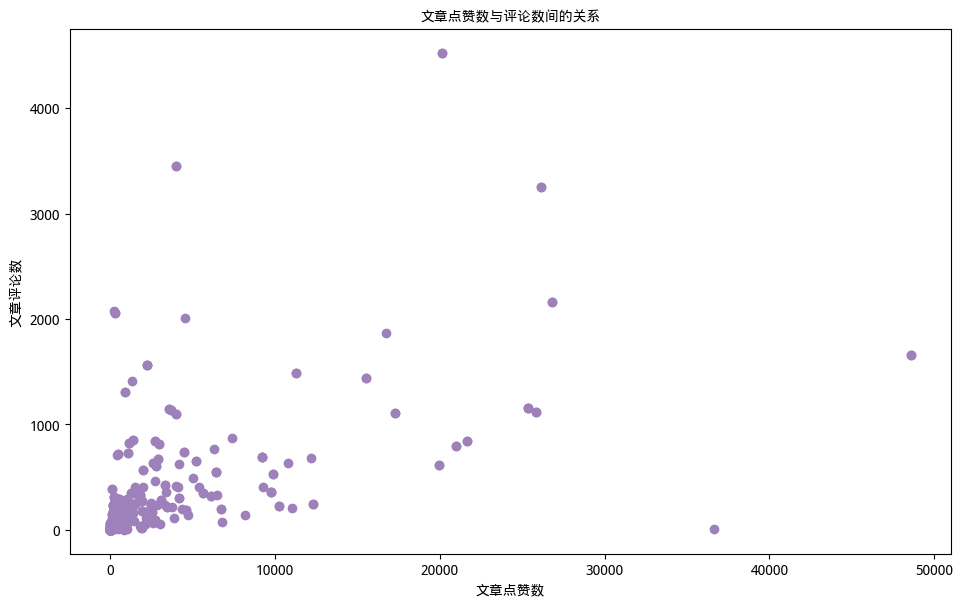

In [39]:
# 调用plt，作散点图
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号）
plt.subplot(2,2,3)
ax1=plt.scatter(c_x,c_y,color = '#9e81ba',marker='o')
# 设置图片标题
plt.title('文章点赞数与评论数间的关系')
# 设置横坐标标签
plt.xlabel('文章点赞数')
# 设置纵坐标标签
plt.ylabel('文章评论数')
# 设置图片大小
ax1.figure.set_size_inches(25,15)

In [40]:
# task6--提取“task_3.2_zhihu_timeline_article.csv”中【文章点赞数】低于 1000 的行数据
d = zhihu_data_article[zhihu_data_article['文章点赞数'] < 1000]['文章点赞数']
print(d)
print('-'*30)
print(type(d))

0      774
2      339
3      149
4       38
5      305
      ... 
489    417
491    565
492    380
493      1
495    134
Name: 文章点赞数, Length: 305, dtype: int64
------------------------------
<class 'pandas.core.series.Series'>


In [41]:
d_x = d.tolist()
print(d_x[:10])

[774, 339, 149, 38, 305, 417, 171, 170, 468, 521]


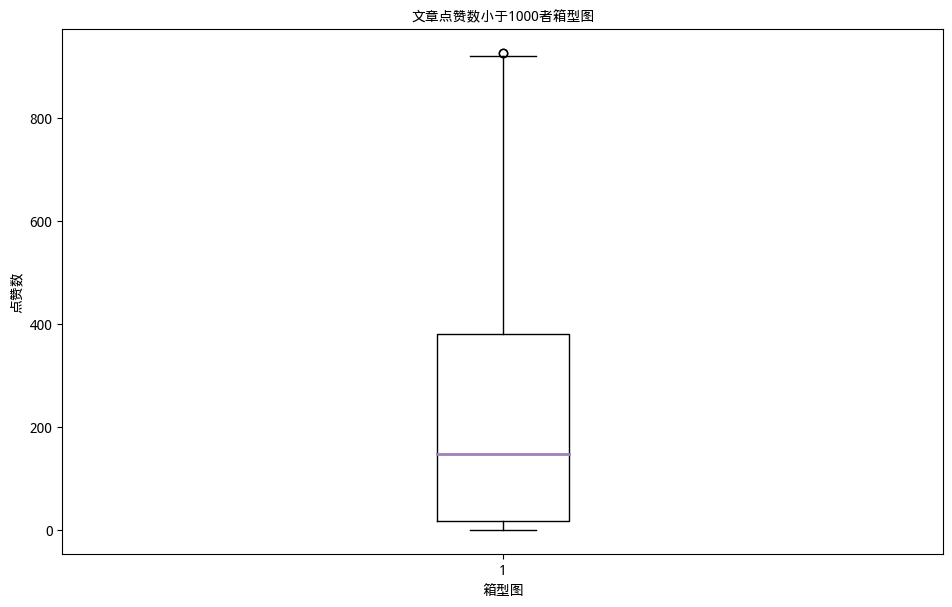

In [42]:
# 调用plt，作箱型图
# 设置图片大小
plt.figure(figsize=(25,15))
plt.subplot(2,2,4)
plt.boxplot(d_x,medianprops=dict(color='#9e81ba',linewidth=2))
# 设置图片标题
plt.title('文章点赞数小于1000者箱型图')
# 设置图片横轴标签
plt.xlabel("箱型图")
# 设置图片纵轴标签
plt.ylabel("点赞数")
# 展示图片
plt.show()

In [43]:
# 案例三：pyecharts，作条形图、玫瑰图

# 利用 pyecharts 将链家房源信息制作成相关可视化图表
!pip install pyecharts
from pyecharts.charts import Bar,Pie
from pyecharts import options as opts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 1.4 MB/s eta 0:00:00


In [44]:
# task1--读取 Task_4_lianjia_sale.csv 数据
# 利用 groupby 函数，以【区域】字段进行 groupby,
# 同时结合 agg 聚合函数统计各个区域平均房价;
# 将统计所得平均房价命名为【区域平均价格】列;
# 并将数据从小到大按顺序排列;
# 最后展示所得前 5 行数据 (将所得的 DataFrame 命名为 df_avg);
df1 = pd.read_csv('/kaggle/input/lianjia2-data/Task_4_lianjia_sale.csv')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66015 entries, 0 to 66014
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   房型      66015 non-null  object 
 1   价格      66015 non-null  int64  
 2   小区      66015 non-null  object 
 3   面积（㎡）   66015 non-null  float64
 4   建造年份    66015 non-null  int64  
 5   户型      66015 non-null  object 
 6   朝向      66015 non-null  object 
 7   装修类型    66015 non-null  object 
 8   楼层      66015 non-null  object 
 9   区域      66015 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 5.0+ MB
None


In [45]:
df_avg = df1.groupby('区域')['价格'].agg(区域平均价格='mean').sort_values(by='区域平均价格')
print(df_avg.head())

          区域平均价格
区域              
金山  19304.818824
奉贤  23662.131268
松江  36461.715479
嘉定  36587.687199
青浦  37078.860149


In [46]:
b = df_avg['区域平均价格'].tolist()
b = np.round(b).tolist()

In [47]:
# task2--利用 pyecharts 将第(1)问所得数据作条形图，
# 图表标题为“上海各区域平均价格”;
bar = Bar()
bar.add_xaxis(df_avg.index.tolist())
bar.add_yaxis('区域平均价格',b,label_opts=opts.LabelOpts(color='white'))
bar.set_colors(['#9e81ba'])
bar.render_notebook()

In [48]:
# task3--利用 groupby 函数，以【装修类型】字段进行 groupby，
# 同时结合 agg 聚合函数统计各个区域房源数量;
# 将统计所得数据命名为【房源数量】列;
# 最后展示所得数据(将所得的 DataFrame 命名为 df_zhuangxiu);
df_zhuangxiu= df1.groupby('装修类型')['小区'].agg(房源数量 = "count")
print(df_zhuangxiu)

       房源数量
装修类型       
其他     5414
毛坯     5357
简装    22819
精装    32425


In [49]:
# task4--利用 pyecharts，作玫瑰图
# 图表标题为“装修类型占比情况”
data = [list(z) for z in zip(df_zhuangxiu.index,df_zhuangxiu["房源数量"])]
c = (
    Pie(init_opts=opts.InitOpts(width="1000px"))
        .add("", data,radius=["30%","75%"],center=["35%","50%"],rosetype="radius")
        .set_global_opts(title_opts=opts.TitleOpts(title="装修类型占比情况"))
        .set_colors(['#d8cde3','#c7b2c7','#cea0c9','#9e81ba'])#设置颜色
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}",position='outside'))
)
c.render_notebook()

In [50]:
# 案例四：pyecharts，作地图图表

# 利用 pyecharts 将链家房源信息根据相应特点制作地图图表
# 读取CSV格式文件
df1 = pd.read_csv('/kaggle/input/lianjia2-data/Task_4_lianjia_sale.csv')
print(df1)

                                房型     价格                 小区   面积（㎡）  建造年份  \
0         大华电梯两房/房型正气/开门南北通/房东诚意出售  76531  大华锦绣华城(十六街区)(公寓)    90.16  2010   
1      非底楼 满五年唯一 税费少 婚房装修 楼称佳 户型方正  52290               芳雅苑    63.11  1995   
2      满五唯一+7号线锦绣路+复式房+带阁楼+小区央位+精装  62878               锦博苑    79.52  2007   
3         13号线陈春路地铁400米中间楼层诚意卖看房方便  45866              鹏海小区    71.95  1997   
4        朝阳正气一房，采光好，坐看花园，户型方正，看房方便  83942            万邦都市花园    54.80  2004   
...                            ...    ...                ...     ...   ...   
66010                富丽苑 2室2厅 275万  29743               富丽苑    92.46  2005   
66011      房东自住精装修，集中式空调系统加地暖，带电梯。  35650            金辉兰湖美域   182.33  2013   
66012             美兰湖颐景园 2室2厅 276万  32838            美兰湖颐景园    84.05  2007   
66013     五楼低总价，两房朝南，满五唯一，格局好，配套齐全  26493              罗南二村    69.83  1996   
66014      满五唯一，带电梯，精装修近地铁，户型方正楼层好  39983             美兰湖岭域    92.04  2010   

          户型     朝向  装修类型           楼层  区域  
0      2室2厅      南

In [51]:
# 根据之前所统计的上海各个区的房均价数据，
# 利用Pyecharts中的Map，以上海地图为背景作可视化展示图
# 利用groupby函数，以【区域】字段进行groupby，
# 同时结合agg聚合函数统计各个区域平均房价，将统计所得平均房价命名为【区域平均价格】
# df.groupby("被统计的列")["选择一列做运算"].agg({"新列名": "mean"}).sort_values(by="新列名")
df_avg = df1.groupby("区域")["价格"].agg(区域平均价格='mean').sort_values(by='区域平均价格')
print(df_avg.head(5))

          区域平均价格
区域              
金山  19304.818824
奉贤  23662.131268
松江  36461.715479
嘉定  36587.687199
青浦  37078.860149


In [52]:
from pyecharts.charts import Map
from pyecharts import options as opts

In [53]:
# 定义区域名字
districts = ['金山区', '奉贤区', '嘉定区','松江区', '青浦区', '宝山区',\
             '闵行区', '浦东新区', '普陀区', '杨浦区', '虹口区', '长宁区', '静安区', '徐汇区', '黄浦区']
# 将avg_price数据值转成list 并将数值转成整数，作为纵坐标数据
avg_price = np.round(df_avg["区域平均价格"].values).tolist()

In [54]:
# 构造地图对象
m = Map()
m.add('房价',[list(z) for z in zip(districts, avg_price)], "上海")
# 设置标题，设置数值范围0-10万，is_piecewise标签值连续
m.set_global_opts(title_opts=opts.TitleOpts(title="上海各区房价"),\
                  visualmap_opts=opts.VisualMapOpts(max_=100000, is_piecewise=False))

In [55]:
# 渲染
m.render_notebook()

In [56]:
# 案例五：pyecharts，作双折线图

# 利用tushare提取中国茅台数据,并用最高最低价，作双折线图
# import tushare as ts
# df1 = ts.pro_bar(ts_code='600519.SH', start_date='20190101', end_date='20191231')
# df1.to_csv("中国茅台2019年数据.csv")
# 由于 tushare 接口限制，需重新配置，直接用本地已导出的文件
df1 = pd.read_csv('/kaggle/input/mtsj-data/2019.csv')
df1 = df1.sort_values(by="trade_date", ascending=True)
print(df1.head())

   Unnamed: 0    ts_code  trade_date    open    high     low   close  \
0         243  600519.SH    20190102  609.98  612.00  595.01  598.98   
1         242  600519.SH    20190103  599.97  601.66  585.80  590.00   
2         241  600519.SH    20190104  587.28  607.67  582.02  602.00   
3         240  600519.SH    20190107  608.00  612.00  602.22  605.49   
4         239  600519.SH    20190108  605.50  612.00  600.28  604.79   

   pre_close  change  pct_chg       vol       amount  
0     590.01    8.97   1.5203  62286.49  3754387.984  
1     598.98   -8.98  -1.4992  30977.35  1838179.174  
2     590.00   12.00   2.0339  37683.47  2258501.484  
3     602.00    3.49   0.5797  34750.13  2105981.461  
4     605.49   -0.70  -0.1156  28838.13  1750413.219  


In [57]:
from pyecharts import options as opts
from pyecharts.charts import Line

In [58]:
# 将时间提取出来并转成list
Time = df1['trade_date'].astype('str').tolist()
# 将最高价格提取出来并转成list
high_price = df1['high'].tolist()
# 将每日最低价格提取出来并转成list
low_price = df1['low'].tolist()

In [59]:
# 构造折线图对象
line = Line()
# 添加横坐标数值
line.add_xaxis(Time)
# 添加纵坐标数值
line.add_yaxis("high",high_price,color="#6a4c9c")
line.add_yaxis("low",low_price,color="#cea0c9")
# 设置标题为折线图
line.set_global_opts(title_opts = opts.TitleOpts(title = "折线图"))
# 设置纵坐标最小值为400
line.set_global_opts(yaxis_opts=opts.AxisOpts(type_="value",min_=400,))
# 渲染图片
line.render_notebook()

In [60]:
# 案例六：pyecharts，作水球图、仪表盘图

# 计算中国茅台的平均涨跌幅，并分别以水球图和仪表盘图表现出来
# 导入pyecharts.charts中的liquid，作水球图
from pyecharts.charts import Liquid, Page
# 导入配置项入口
from pyecharts import options as opts

In [61]:
# 中国茅台的平均日涨幅
pct_chg = df1["pct_chg"].mean()
# 构造水球图对象
l = Liquid()
# l.add("", [显示百分比(可以有多组数据)])
l.add("", [pct_chg],color=['#9e81ba'],background_color='#f7f2ff',\
      is_outline_show=False,label_opts=opts.LabelOpts(color='#9e81ba'))
# 设置标题
l.set_global_opts(title_opts=opts.TitleOpts(title="中国茅台2019平均日涨幅"))
# 渲染图片
l.render_notebook()

In [62]:
from pyecharts.charts import Page,Gauge
g = Gauge()
g.add("中国茅台2019平均日涨幅",[("", round(pct_chg * 100, 2))]).set_colors('#9e81ba')
g.render_notebook()

In [63]:
# 案例七：pyecharts，作词云图

# task3 统计A股各行业公司数量，并跟进行业分布数据作词云图
# pro = ts.pro_api()
# df2 = pro.stock_basic()
# df2.to_csv("tushare_导出A股行业数据.csv")
# 同样地，直接应用本地用tushare导出的文件
df2 = pd.read_csv('/kaggle/input/tushare-a/tushare_A.csv',encoding='utf-8')
# 展示前10行数据
print(df2.head(10))
# 利用groupby函数，以【industry】字段进行groupby，同时结合agg聚合函数统计各个行业的公司数量，将统计所得数据命名为【公司数量】
# df.groupby("被统计的列")["选择一列做运算"].agg({"新列名": "count"})
df_industry = df2.groupby("industry")["industry"].agg(公司数量="count")
print(df_industry)

   Unnamed: 0    ts_code  symbol  name area industry cnspell market  \
0           0  000001.SZ       1  平安银行   深圳       银行    payh     主板   
1           1  000002.SZ       2   万科A   深圳     全国地产     wka     主板   
2           2  000004.SZ       4  国华网安   深圳     软件服务    ghwa     主板   
3           3  000006.SZ       6  深振业A   深圳     区域地产    szya     主板   
4           4  000007.SZ       7   全新好   深圳     其他商业     qxh     主板   
5           5  000008.SZ       8  神州高铁   北京     运输设备    szgt     主板   
6           6  000009.SZ       9  中国宝安   深圳     电气设备    zgba     主板   
7           7  000010.SZ      10  美丽生态   深圳     建筑工程    mlst     主板   
8           8  000011.SZ      11  深物业A   深圳     房产服务    swya     主板   
9           9  000012.SZ      12   南玻A   深圳       玻璃     nba     主板   

   list_date            act_name act_ent_type  
0   19910403              无实际控制人            无  
1   19910129  深圳市人民政府国有资产监督管理委员会         地方国企  
2   19910114                 李映彤         民营企业  
3   19920427  深圳市人民政府国有资产监

In [64]:
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud

In [65]:
# 提取各个行业以及其所对应的公司数量，即 行业名字：公司数量
words = list(zip(df_industry.index.values.tolist(), df_industry["公司数量"].values.tolist()))
print(words)

[('IT设备', 76), ('专用机械', 267), ('中成药', 72), ('乳制品', 21), ('互联网', 82), ('仓储物流', 45), ('供气供热', 44), ('保险', 6), ('元器件', 290), ('全国地产', 26), ('公共交通', 7), ('公路', 4), ('其他商业', 13), ('其他建材', 30), ('农业综合', 43), ('农用机械', 13), ('农药化肥', 56), ('出版业', 29), ('化学制药', 151), ('化工原料', 245), ('化工机械', 13), ('化纤', 30), ('区域地产', 48), ('医疗保健', 173), ('医药商业', 36), ('半导体', 177), ('商品城', 4), ('商贸代理', 18), ('啤酒', 8), ('园区开发', 15), ('塑料', 75), ('多元金融', 26), ('家居用品', 68), ('家用电器', 90), ('小金属', 60), ('工程机械', 36), ('广告包装', 55), ('建筑工程', 127), ('影视音像', 36), ('房产服务', 12), ('批发业', 6), ('摩托车', 12), ('文教休闲', 51), ('新型电力', 24), ('旅游景点', 17), ('旅游服务', 8), ('日用化工', 19), ('普钢', 26), ('服饰', 65), ('机场', 5), ('机床制造', 24), ('机械基件', 129), ('林业', 4), ('染料涂料', 32), ('橡胶', 14), ('水力发电', 20), ('水务', 15), ('水泥', 23), ('水运', 19), ('汽车整车', 23), ('汽车服务', 10), ('汽车配件', 238), ('渔业', 6), ('港口', 18), ('火力发电', 32), ('焦炭加工', 8), ('煤炭开采', 25), ('特种钢', 10), ('环境保护', 122), ('玻璃', 18), ('生物制药', 77), ('电信运营', 6), ('电器仪表', 104), ('电器连锁', 2), ('电气设备',

In [66]:
# 构造词云图对象
wc = WordCloud()
# wc.add("", 数据, word_size_range=[词云图文字的大小范围])
wc.add("", words, word_size_range=[20, 100])
# 设置标题
wc.set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-基本示例"))
# 渲染图片
wc.render_notebook()

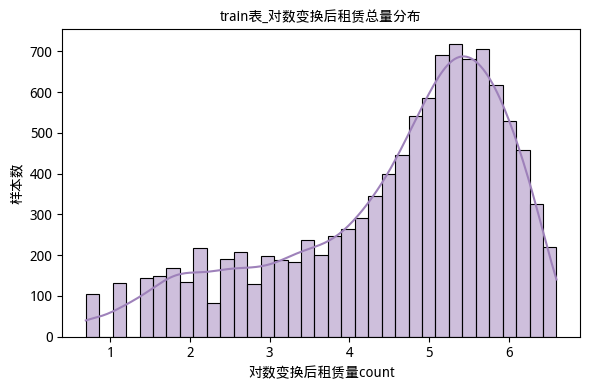

In [67]:
# 案例八：Seaborn绘制带核密度线的直方图
# 以下为Kaggle平台，Bike_Sharing_demand的部分代码；
# 其已在该项目上作完整展示，这里仅将需用到的数据，加载运行；
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")#忽略警告
df1 = pd.read_csv('/kaggle/input/kaggle-bike/Kaggle_Bike_df1.csv')
df_y = np.log1p(df1['count'])
ax1 = sns.displot(df_y,kde = True,color='#9e81ba')
ax1.figure.set_size_inches(6,4)
ax1.figure.set_dpi(100)
ax1.despine(top=False,right=False)
plt.title('train表_对数变换后租赁总量分布')
plt.xlabel('对数变换后租赁量count')
plt.ylabel('样本数')
plt.tight_layout()
plt.show()
# 图中可见，log变换后，count列的分布、集中度没那么严重了，差异也相对较小了；
# 即，之后预测，需先做log变换；

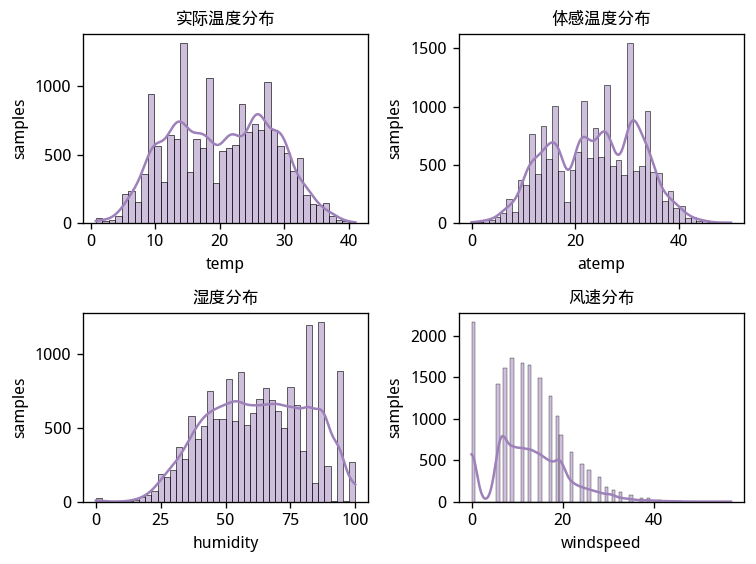

In [68]:
# 案例九：Seaborn绘制多个带核密度线的直方图
# 并将多个子图放置一个画布；
# 以下依然为，Kaggle平台，Bike_Sharing_demand的部分代码，且仅将图中应用的数据作运行；

# 概览风速、湿度等特征的频率分布；
# 读取数据
df2 = pd.read_csv('/kaggle/input/kaggle-bike-2/Kaggle_Bike_df2.csv')
fig,axes = plt.subplots(2,2)
ax1 = sns.histplot(df2['temp'],kde = True,ax=axes[0,0],color='#9e81ba')
ax2 = sns.histplot(df2['atemp'],kde = True,ax=axes[0,1],color='#9e81ba')
ax3 = sns.histplot(df2['humidity'],kde = True,ax=axes[1,0],color='#9e81ba')
ax4 = sns.histplot(df2['windspeed'],kde = True,ax=axes[1,1],color='#9e81ba')
ax1.figure.set_dpi(120)
ax2.figure.set_dpi(120)
ax3.figure.set_dpi(120)
ax4.figure.set_dpi(120)
axes[0,0].set(xlabel = 'temp',ylabel = 'samples',title ='实际温度分布')
axes[0,1].set(xlabel = 'atemp',ylabel = 'samples',title ='体感温度分布')
axes[1,0].set(xlabel = 'humidity',ylabel = 'samples',title ='湿度分布')
axes[1,1].set(xlabel = 'windspeed',ylabel = 'samples',title ='风速分布')
plt.tight_layout() # 防止标题溢出
plt.show()

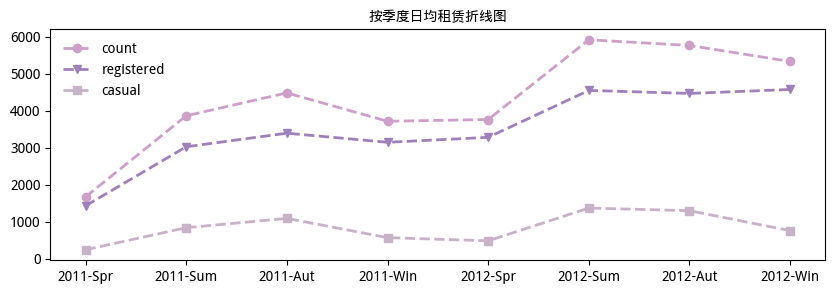

In [69]:
# 案例十：matplotlib，作多个变量的折线图
# 以下依然为，Kaggle平台，Bike_Sharing_demand的部分代码，且仅将图中应用的数据作运行；
# 作折线图
df3 = pd.read_csv('/kaggle/input/kaggle-bike-3/Kaggle_Bike_df3.csv')
plt.figure(figsize=(10,3),dpi=100)
plt.plot(df3['season1'],df3['count'],label = 'count',color = '#cea0c9',linewidth=2,marker='o',linestyle='--')
plt.plot(df3['season1'],df3['registered'],label = 'registered',color = '#9e81ba',linewidth=2,marker='v',linestyle='--')
plt.plot(df3['season1'],df3['casual'],label = 'casual',color = '#c7b2c7',linewidth=2,marker='s',linestyle='--')
plt.title('按季度日均租赁折线图')
plt.legend(loc = 2,frameon=False)
plt.show()

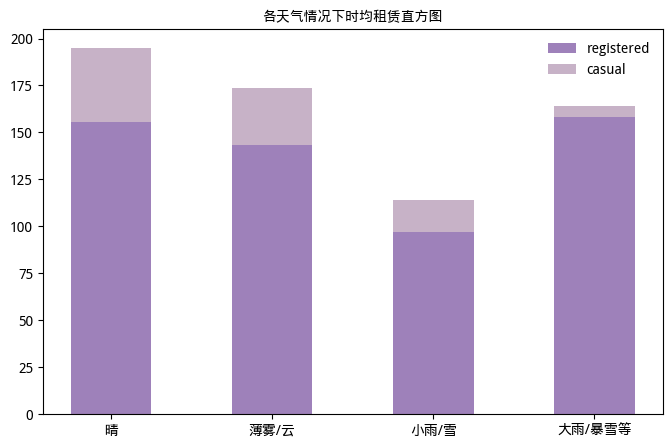

In [70]:
# 案例十一：matplotlib，作堆叠直方图
# 以下依然为，Kaggle平台，Bike_Sharing_demand的部分代码，且仅将图中应用的数据作运行；
# 作堆叠直方图
df4 = pd.read_csv('/kaggle/input/kaggle-bike-4/Kaggle_Bike_df4.csv')
df_weather = df4.groupby('weather')[['count','registered','casual']].mean().reset_index()
# 将x轴的天气数值换成文字形式；
# weather：天气概况；1：晴、少云等，2：薄雾+云，3：小雨小雪，4：大雨雷暴大雪等；
df_weather['weather'] = df_weather.apply(lambda x:'晴' if x['weather'] == 1 \
    else '薄雾/云' if x['weather'] == 2 else '小雨/雪' if x['weather'] == 3 else '大雨/暴雪等',axis = 1)
x1 = df_weather['weather']
y1 = df_weather['registered']
y2 = df_weather['casual']
plt.figure(figsize=(8,5),dpi=100)
plt.bar(x1,y1,label = 'registered',color = '#9e81ba',width =0.5)
plt.bar(x1,y2,label = 'casual',color = '#c7b2c7',width =0.5,bottom=y1)
plt.title('各天气情况下时均租赁直方图')
plt.legend(loc = 1,frameon=False)
plt.show()

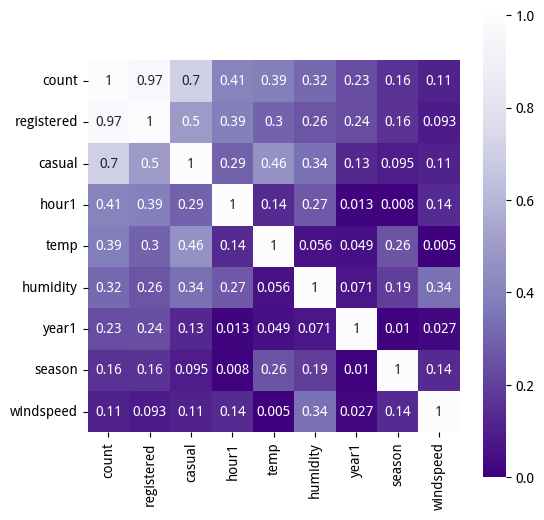

In [71]:
# 案例十二：Seaborn，作相关性分析的热力图
# 以下依然为，Kaggle平台，Bike_Sharing_demand的部分代码，且仅将图中应用的数据作运行；
df5 = pd.read_csv('/kaggle/input/kaggle-bike-5/Kaggle_Bike_df5.csv')
df_corr = np.round(np.abs(df5.corr()),3)
plt.figure(figsize=(6,6),dpi=100)
# cmap 来配置颜色
sns.heatmap(df_corr,cmap = 'Purples_r',vmin=0,vmax=1,square=True,annot=True,cbar=True)
plt.show()
# 小结：
# 1）以上是把train表中，数值型的特征和结果项做了相关性分析与展示；
# 2）图中可见，相关性越强的，颜色越浅；
# 3）且，为了只分析相关强度，对可能呈现负相关的，取绝对值；